In [1]:
# Загружаем библиотеки
import codecs
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from pathlib import Path
print(tf.__version__)

2.8.0


Загружаем данные в датафреймы

In [2]:
replicas_df = pd.read_csv('movie_lines.txt', sep= " ::: " , encoding = 'Windows-1251', engine='python', header=None)
replicas_df.columns = ['lineID', 'characterID', 'movieID', 'character name', 'text of the utterance']
replicas_df

,lineID,characterID,movieID,character name,text of the utterance
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.
...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
304709,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
304710,L666369,u9030,m616,DURNFORD,"Your orders, Mr Vereker?"
304711,L666257,u9030,m616,DURNFORD,"Good ones, yes, Mr Vereker. Gentlemen who can ..."


In [3]:
dialogues_df = pd.read_csv('movie_conversations.txt', sep= " ::: " , encoding = 'Windows-1251', engine='python', header=None)
dialogues_df.columns = ['characterID_1', 'characterID_2', 'movieID', 'list of the utterances']
dialogues_df

,characterID_1,characterID_2,movieID,list of the utterances
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"
...,...,...,...,...
83092,u9028,u9031,m616,"['L666324', 'L666325', 'L666326', 'L666327']"
83093,u9028,u9031,m616,"['L666575', 'L666576']"
83094,u9030,u9034,m616,"['L666256', 'L666257']"
83095,u9030,u9034,m616,"['L666369', 'L666370', 'L666371', 'L666372']"


In [4]:
movies_df = pd.read_csv('movie_titles_metadata.txt', sep= " ::: " , encoding = 'Windows-1251', engine='python', header=None)
movies_df.columns = ['movieID', 'movie title', 'movie year', 'IMDB rating', 'no. IMDB votes', 'genres']
movies_df

,movieID,movie title,movie year,IMDB rating,no. IMDB votes,genres
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."
...,...,...,...,...,...,...
612,m612,watchmen,2009,7.8,135229,"['action', 'crime', 'fantasy', 'mystery', 'sci..."
613,m613,xxx,2002,5.6,53505,"['action', 'adventure', 'crime']"
614,m614,x-men,2000,7.4,122149,"['action', 'sci-fi']"
615,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']"


In [5]:
characters_df = pd.read_csv('movie_characters_metadata.txt', sep= " ::: " , encoding = 'Windows-1251', engine='python', header=None)
characters_df.columns = ['characterID', 'character name', 'movieID', 'movie title', 'gender', 'position in credits']
characters_df

,characterID,character name,movieID,movie title,gender,position in credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6
...,...,...,...,...,...,...
9030,u9030,DURNFORD,m616,zulu dawn,?,?
9031,u9031,MELVILL,m616,zulu dawn,?,?
9032,u9032,NORRIS-NEWMAN,m616,zulu dawn,?,?
9033,u9033,STUART SMITH,m616,zulu dawn,?,?


Посмотрим пример одногшо из диалогов

In [6]:
for row in replicas_df[replicas_df.lineID.isin(['L194', 'L195', 'L196', 'L197'])].sort_values('lineID')['text of the utterance']:
    print(row)

Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
Well, I thought we'd start with pronunciation, if that's okay with you.
Not the hacking and gagging and spitting part.  Please.
Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


Далее логика была такая. Для обучения нам нужна реплика одного персонажа и ответ другого -вход и выход декодера. Поэтому берем каждый диалог. Если число реплик нечетное - значит одна из реплик осталась без ответа. Отбрасываем ее. И формируем два списка реплик - input_texts и target_texts. Вначале я так и сделал (см. закомментированный код ниже) и, забегая вперед, при этом максимальная длина реплики, до которой далее добивались все остальные реплики, составила около 500 слов. Тогда количество параметров просто зашкаливало и оперативки просто не хватало.

In [ ]:
# input_texts = []
# target_texts = []
# for dialog in dialogues_df['list of the utterances']:
#     dialog_list = dialog[1:-1].split(', ')
#     replicas_num = len(dialog_list)
#     if replicas_num > 1:
#         for i in range(len(dialog_list) // 2):
#             input_text = replicas_df[replicas_df['lineID'] == dialog_list[i * 2][1:-1]].iloc[0]['text of the utterance']
#             target_text = replicas_df[replicas_df['lineID'] == dialog_list[i * 2 + 1][1:-1]].iloc[0]['text of the utterance']
#             input_texts.append(input_text)
#             target_texts.append(target_text)

In [ ]:
# input_idxs_to_del = [i for i, v in enumerate(input_texts) if v == None]
# for i in sorted(input_idxs_to_del, reverse=True):
#     del input_texts[i]
#     del target_texts[i]
# target_idxs_to_del = [i for i, v in enumerate(target_texts) if v == None]
# for i in sorted(target_idxs_to_del, reverse=True):
#     del input_texts[i]
#     del target_texts[i]

In [ ]:
# with open("input_texts.txt", "wb") as myFile:
#     pickle.dump(input_texts, myFile)
# with open("target_texts.txt", "wb") as myFile:
#     pickle.dump(target_texts, myFile)

Но нам по логике такая длина не нужна, ведь чат бот - это короткие вопросы и ответы. Такие длинные реплики наоборот приведут при обучении к худшим результатам. Тогда я проанализировал все доступный реплики по длине. Сколько реплик попадают в какой интервал длины.

In [7]:
replicas_df['words_number'] = replicas_df['text of the utterance'].apply(lambda x: len(x.split()) if x != None else x)
pd.cut(replicas_df['words_number'], bins=19).value_counts()

(0.445, 30.211]       287959
(30.211, 59.421]       13782
(59.421, 88.632]        1963
(88.632, 117.842]        478
(117.842, 147.053]       144
(147.053, 176.263]        63
(176.263, 205.474]        34
(205.474, 234.684]         9
(293.105, 322.316]         5
(263.895, 293.105]         3
(234.684, 263.895]         3
(322.316, 351.526]         1
(468.368, 497.579]         1
(526.789, 556.0]           1
(351.526, 380.737]         0
(380.737, 409.947]         0
(409.947, 439.158]         0
(439.158, 468.368]         0
(497.579, 526.789]         0
Name: words_number, dtype: int64

Как мы видим, большая часть реплик в интервале длины до 30 слов. Это уже куда лучше. Тогда формируем другие списки для обучения - input_texts_short и target_texts_short. При этом отсекаем реплики более 30 слов и если реплика пустая (None).

In [ ]:
# input_texts_short = []
# target_texts_short = []
# for dialog in dialogues_df['list of the utterances']:
#     dialog_list = dialog[1:-1].split(', ')
#     replicas_num = len(dialog_list)
#     if replicas_num > 1:
#         for i in range(len(dialog_list) // 2):
#             input_text = replicas_df[replicas_df['lineID'] == dialog_list[i * 2][1:-1]].iloc[0]['text of the utterance']
#             target_text = replicas_df[replicas_df['lineID'] == dialog_list[i * 2 + 1][1:-1]].iloc[0]['text of the utterance']
#             if (input_text != None) and (target_text != None):
#                 if (len(input_text.split()) <= 30) and (len(target_text.split()) <= 30):
#                     input_texts_short.append(input_text)
#                     target_texts_short.append(target_text)

In [ ]:
Так как это занимает некоторое время, я сохранил эти списки во внешний файл через pickle

In [ ]:
# with open("input_texts_short.txt", "wb") as myFile:
#     pickle.dump(input_texts_short, myFile)
# with open("target_texts_short.txt", "wb") as myFile:
#     pickle.dump(target_texts_short, myFile)

In [ ]:
Теперь с любого из моих компьютеров я просто загружаю их в jupyter notebook и работаю с ними

In [8]:
with open("input_texts_short.txt", "rb") as myFile:
    input_texts = pickle.load(myFile)
with open("target_texts_short.txt", "rb") as myFile:
    target_texts = pickle.load(myFile)

Вот столько реплик получилось

In [9]:
len(input_texts), len(target_texts)

(124082, 124082)

### Подготовка словарей

Составим словари из слов, добавив символ начала <START>, символ конца <END> и пробел, как элемент для паддинга цепочек, короче самой длинной.

In [10]:
def prepare_vocab(texts):
    vocab = sorted(set(' '.join(texts).split()))
    vocab.append('<START>')
    vocab.append('<END>')
    vocab.append(' ')
    vocab_size = len(vocab)
    word2idx = {u:i for i, u in enumerate(vocab)}
    idx2word = np.array(vocab)
    return vocab_size, word2idx, idx2word

INPUT_VOCAB_SIZE, input_word2idx, input_idx2word = prepare_vocab(input_texts)
TARGET_VOCAB_SIZE, target_word2idx, target_idx2word = prepare_vocab(target_texts)

In [11]:
print(INPUT_VOCAB_SIZE, TARGET_VOCAB_SIZE)

84870 81724


### Подготовка обучающего датасета




In [12]:
input_texts_as_int = [[input_word2idx[c] for c in text.split()] for text in input_texts]
target_texts_as_int = [[target_word2idx[c] for c in text.split()] for text in target_texts]

encoder_input_seqs = [np.array(text) for text in input_texts_as_int]
decoder_input_seqs = []
decoder_target_seqs = []
for target_text in target_texts_as_int:
    decoder_input_seqs.append(np.array([target_word2idx['<START>']] + target_text))
    decoder_target_seqs.append(np.array(target_text + [target_word2idx['<END>']]))

### Паддинг цепочек


In [13]:
max_enc_seq_length = max([len(seq) for seq in encoder_input_seqs]) # 30
max_dec_seq_length = max([len(seq) for seq in decoder_input_seqs]) # 31
print(max_enc_seq_length, max_dec_seq_length)

encoder_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    encoder_input_seqs,
    value=input_word2idx[' '],
    padding='post',
    maxlen=max_enc_seq_length)

decoder_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    decoder_input_seqs,
    value=target_word2idx[' '],
    padding='post',
    maxlen=max_dec_seq_length)

decoder_target_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    decoder_target_seqs,
    value=target_word2idx[' '],
    padding='post',
    maxlen=max_dec_seq_length)

30 31


### Создание модели

Описывать подробно как я реализовал механизм внимания долго. Все видно по коду. Не знаю, правильно или нет, но главное сам. Принцип везде описан. Вроде на словах все просто, но нюансов куча. Готовой реализации не нашел в интернете, чтоб хоть на что то ориентироваться. Вернее они есть, но зачастую с такой замороченной архитектурой, рассчитанной скорее на трансформер, наверное. Поэтому и сделал сам, как я это понял.

In [14]:
H_SIZE = 256 # Размерность скрытого состояния LSTM
EMB_SIZE = 256 # размерность эмбеддингов (и для входных и для выходных цепочек)

class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(INPUT_VOCAB_SIZE, EMB_SIZE)
        self.bi_lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(H_SIZE//2, return_sequences=True, return_state=True))
        
    def call(self, x):
        # print('Вход в энкодер: ', x.shape)
        out = self.embed(x)
        # print('Эмбеддинг: ', out.shape)
        out, h1, c1, h2, c2 = self.bi_lstm(out)
        # print('LSTM out, h1, c1, h2, c2: ', out.shape, h1.shape, c1.shape, h2.shape, c2.shape)
        h = tf.keras.layers.concatenate([h1, h2], axis = 1)
        c = tf.keras.layers.concatenate([c1, c2], axis = 1)
        state = (h, c)
        return out, state

class Attention(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # self.inp = tf.keras.layers.Input(shape=(None, EMB_SIZE + H_SIZE))
        # self.w = tf.keras.layers.Dense(1, use_bias=False)
        self.attention_model = tf.keras.Sequential(
            [tf.keras.layers.Dense(1, use_bias=False, input_shape=(None, EMB_SIZE + H_SIZE))]
        )
        self.norm = tf.keras.layers.Softmax()
    
    def call(self, encoder_outs, decoder_memory):
        if encoder_outs.shape[1] == None:
            seq_length = max_enc_seq_length
        else:
            seq_length = encoder_outs.shape[1] 
        arrays = [decoder_memory[0] for _ in range(seq_length)]
        decoder_memory_new = tf.stack(arrays, axis=1)
        sum_vec = tf.concat([encoder_outs, decoder_memory_new], axis = 2)
        # print(sum_vec)
        # attention_model = tf.keras.Model([self.inp], self.w)
        # normalized_weights = self.norm(self.attention_model(sum_vec).numpy().reshape(encoder_outs.shape[0], -1)).numpy()
        normalized_weights = self.norm(self.attention_model(sum_vec)[:, :, 0])
        # print(normalized_weights)
        out_vector = tf.math.multiply(normalized_weights[..., tf.newaxis], encoder_outs)
        # print(out_vector)
        out_vector = tf.reduce_sum(out_vector, 1)        
        return out_vector

class Decoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(TARGET_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(H_SIZE, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(TARGET_VOCAB_SIZE, activation='softmax')
        self.attention_models = [Attention() for _ in range(max_dec_seq_length)]
        
    def call(self, x, encoder_outs, init_state):
        # print('Вход в декодер: ', x.shape)
        # print('init_state: ', init_state[0].shape, init_state[1].shape)
        # out = self.embed(x)
        # print('Эмбеддинг: ', out.shape)
        if encoder_outs.shape[1] == None:
            dec_seq_length = max_dec_seq_length
        else:
            dec_seq_length = x.shape[1]
        total_out = []
        for i in range(dec_seq_length):
            out = self.embed(x[:, i])
            # print(out)
            context = self.attention_models[i](encoder_outs, init_state)
            # print(context)
            out = tf.concat((out, context), axis = 1)
            # print(out)
            out, h, c = self.lstm(out[:, tf.newaxis, :], initial_state=init_state)
            # print(out, h, c)
            init_state = (h, c)
            # print('LSTM out, h, c: ', out.shape, h.shape, c.shape)
            out = self.fc(out)
            # print(out)
            total_out.append(out)
        total_out = tf.concat((total_out), axis = 1)
        # print(total_out)
        state = (h, c)
        return total_out, state

encoder_model = Encoder()
decoder_model = Decoder()

encoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_inputs = tf.keras.layers.Input(shape=(None,))

encoder_outputs, enc_state = encoder_model(encoder_inputs)
decoder_outputs, _ = decoder_model(decoder_inputs, encoder_outputs, enc_state)

seq2seq = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
H_SIZE = 256  # Размерность скрытого состояния LSTM
EMB_SIZE = 256  # размерность эмбеддингов (и для входных и для выходных цепочек)


class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(INPUT_VOCAB_SIZE, EMB_SIZE)
        self.bi_lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(H_SIZE // 2, return_sequences=True, return_state=True)
        )

    def call(self, x):
        # print('Вход в энкодер: ', x.shape)
        out = self.embed(x)
        # print('Эмбеддинг: ', out.shape)
        out, h1, c1, h2, c2 = self.bi_lstm(out)
        # print('LSTM out, h1, c1, h2, c2: ', out.shape, h1.shape, c1.shape, h2.shape, c2.shape)
        h = tf.keras.layers.concatenate([h1, h2], axis=1)
        c = tf.keras.layers.concatenate([c1, c2], axis=1)
        state = (h, c)
        return out, state


class Attention(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.attention_model = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(
                    1, use_bias=False, input_shape=(None, EMB_SIZE + H_SIZE)
                )
            ]
        )
        self.norm = tf.keras.layers.Softmax()

    def call(self, encoder_outs, decoder_memory):
        if encoder_outs.shape[1] == None:
            seq_length = max_enc_seq_length
        else:
            seq_length = encoder_outs.shape[1]
        arrays = [decoder_memory[0] for _ in range(seq_length)]
        decoder_memory_new = tf.stack(arrays, axis=1)
        sum_vec = tf.concat([encoder_outs, decoder_memory_new], axis=2)
        normalized_weights = self.norm(self.attention_model(sum_vec)[:, :, 0])
        out_vector = tf.math.multiply(normalized_weights[..., tf.newaxis], encoder_outs)
        out_vector = tf.reduce_sum(out_vector, 1)
        return out_vector


class Decoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(TARGET_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(
            H_SIZE, return_sequences=True, return_state=True
        )
        self.fc = tf.keras.layers.Dense(TARGET_VOCAB_SIZE, activation='softmax')
        self.attention_models = [Attention() for _ in range(max_dec_seq_length)]

    def call(self, x, encoder_outs, init_state):
        if encoder_outs.shape[1] == None:
            dec_seq_length = max_dec_seq_length
        else:
            dec_seq_length = x.shape[1]
        total_out = []
        for i in range(dec_seq_length):
            out = self.embed(x[:, i])
            context = self.attention_models[i](encoder_outs, init_state)
            out = tf.concat((out, context), axis=1)
            out, h, c = self.lstm(out[:, tf.newaxis, :], initial_state=init_state)
            init_state = (h, c)
            out = self.fc(out)
            total_out.append(out)
        total_out = tf.concat((total_out), axis=1)
        state = (h, c)
        return total_out, state


encoder_model = Encoder()
decoder_model = Decoder()

encoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_inputs = tf.keras.layers.Input(shape=(None,))

encoder_outputs, enc_state = encoder_model(encoder_inputs)
decoder_outputs, _ = decoder_model(decoder_inputs, encoder_outputs, enc_state)

seq2seq = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

Посмотрим на архитектуру

In [15]:
seq2seq.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 encoder (Encoder)              ((None, None, 256),  22120960    ['input_1[0][0]']                
                                 ((None, 256),                                                    
                                 (None, 256)))                                                    
                                                                                              

### Обучение модели

In [16]:
# from google.colab import drive
# drive.mount('/content/drive/')
path = Path("D:/Skillbox/")
path.mkdir(exist_ok=True, parents=True)
file_to_save = "chat_bot_best_2.h5"  
path_to_save = str(path / file_to_save)

In [17]:
# !pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [18]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(path_to_save, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# from keras.models import load_model
# model = load_model(path_to_save)

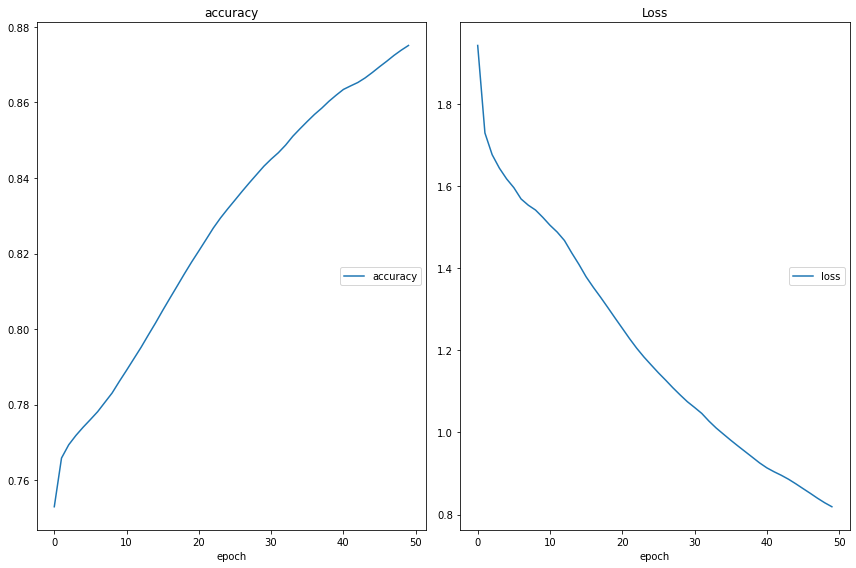

accuracy
	accuracy         	 (min:    0.753, max:    0.875, cur:    0.875)
Loss
	loss             	 (min:    0.819, max:    1.942, cur:    0.819)
1552/1552 [==============================] - 851s 548ms/step - loss: 0.8191 - accuracy: 0.8751


In [19]:
BATCH_SIZE = 80
EPOCHS = 50

loss = tf.losses.SparseCategoricalCrossentropy()
seq2seq.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
seq2seq.fit([encoder_input_seqs, decoder_input_seqs], decoder_target_seqs,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[checkpoint, PlotLossesCallback()])

### Функция для инференса


In [20]:
def seq2seq_inference(input_seq):
    # print(input_seq.shape, type(input_seq))
    enc_out, state = encoder_model(input_seq)
    # print(state[0].shape, state[1].shape)

    target_seq = np.array([[target_word2idx['<START>']]])
    # print(target_seq.shape)

    decoded_sentence = ''
    limit = 0
    while True:
        output_tokens, _ = decoder_model(target_seq, enc_out, state)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = target_idx2word[sampled_token_index]
        limit += 1

        if (sampled_word == '<END>' or
           limit >= max_dec_seq_length):
            break

        target_seq = np.concatenate((target_seq, np.array([[sampled_token_index]])), 1)
    
    for i, word_idx in enumerate(target_seq[0]):
        if i > 0:
            decoded_sentence += target_idx2word[word_idx] + ' '
        

    return decoded_sentence

### Пример инференса


In [21]:
my_enter = 'Hello'
my_enter_check = [input_word2idx[word] for word in my_enter.split() if word in input_word2idx.keys()]
if len(my_enter.split()) != len(my_enter_check):
    print(f'{len(my_enter.split()) - len(my_enter_check)} слов из целевой фразы нет в словаре')
else:
    print('Все ок.')
my_enter = np.array([my_enter_check])

Все ок.


In [22]:
seq2seq_inference(my_enter)

"there, can't. minute, can't. Hello, can't. minute, want. Actually, figure going? Hey, bucks. minutes on! minutes late. on! minutes on! minutes on! minutes on! minutes on! minutes on! guess down, "

In [ ]:
H_SIZE = 256  # Размерность скрытого состояния LSTM
EMB_SIZE = 256  # размерность эмбеддингов (и для входных и для выходных цепочек)


class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(INPUT_VOCAB_SIZE, EMB_SIZE)
        self.bi_lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(H_SIZE // 2, return_sequences=True, return_state=True)
        )

    def call(self, x):
        out = self.embed(x)
        out, h1, c1, h2, c2 = self.bi_lstm(out)
        h = tf.keras.layers.concatenate([h1, h2], axis=1)
        c = tf.keras.layers.concatenate([c1, c2], axis=1)
        state = (h, c)
        return out, state


class Attention(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.attention_model = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(
                    1, use_bias=False, input_shape=(None, EMB_SIZE + H_SIZE)
                )
            ]
        )
        self.norm = tf.keras.layers.Softmax()

    def call(self, encoder_outs, decoder_memory):
        if encoder_outs.shape[1] == None:
            seq_length = max_enc_seq_length
        else:
            seq_length = encoder_outs.shape[1]
        arrays = [decoder_memory[0] for _ in range(seq_length)]
        decoder_memory_new = tf.stack(arrays, axis=1)
        sum_vec = tf.concat([encoder_outs, decoder_memory_new], axis=2)
        normalized_weights = self.norm(self.attention_model(sum_vec)[:, :, 0])
        out_vector = tf.math.multiply(normalized_weights[..., tf.newaxis], encoder_outs)
        out_vector = tf.reduce_sum(out_vector, 1)
        return out_vector


class Decoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(TARGET_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(
            H_SIZE, return_sequences=True, return_state=True
        )
        self.fc = tf.keras.layers.Dense(TARGET_VOCAB_SIZE, activation='softmax')
        self.attention_models = [Attention() for _ in range(max_dec_seq_length)]

    def call(self, x, encoder_outs, init_state):
        if encoder_outs.shape[1] == None:
            dec_seq_length = max_dec_seq_length
        else:
            dec_seq_length = x.shape[1]
        total_out = []
        for i in range(dec_seq_length):
            out = self.embed(x[:, i])
            context = self.attention_models[i](encoder_outs, init_state)
            out = tf.concat((out, context), axis=1)
            out, h, c = self.lstm(out[:, tf.newaxis, :], initial_state=init_state)
            init_state = (h, c)
            out = self.fc(out)
            total_out.append(out)
        total_out = tf.concat((total_out), axis=1)
        state = (h, c)
        return total_out, state


encoder_model = Encoder()
decoder_model = Decoder()

encoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_inputs = tf.keras.layers.Input(shape=(None,))

encoder_outputs, enc_state = encoder_model(encoder_inputs)
decoder_outputs, _ = decoder_model(decoder_inputs, encoder_outputs, enc_state)

seq2seq = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)